<a href="https://colab.research.google.com/github/SharonAngelinaS/Natural-Gas-Price-Prediction-using-Deep-learning-models/blob/main/Natural_Gas_Price_Prediction_Springer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing time series data with pandas
Now we've got some data to work with, let's import it using pandas so we can visualize it.

Because our data is in **CSV (comma separated values)** format (a very common data format for time series), we'll use the pandas [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function.

And because our data has a date component, we'll tell pandas to parse the dates using the `parse_dates` parameter passing it the name our of the date column ("Date").

In [ ]:
# Import with pandas
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/content/Henry_Hub_Natural_Gas_Spot_Price (2) (1).csv", parse_dates=['Date'], index_col=['Date']) # parse the date column (tell pandas column 1 is a datetime)


Looking good! Let's get some more info.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1408 entries, 1997-01-10 to 2024-01-05
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   1408 non-null   float64
dtypes: float64(1)
memory usage: 22.0 KB


Because we told pandas to parse the date column and set it as the index, its not in the list of columns.

You can also see there isn't many samples.

In [ ]:
# How many samples do we have?
len(df)

1408

In [ ]:
# Only want closing price for each day
import pandas as pd
natural_price = pd.DataFrame(df["Price"])
natural_price.head()


# Assuming df is your DataFrame with columns 'Day' and 'Price'
# If you already have 'natural_price' DataFrame, you can skip this step
natural_price = pd.DataFrame(df["Price"])

# Calculate mean, median, and standard deviation
mean_price = natural_price["Price"].mean()
median_price = natural_price["Price"].median()
std_dev_price = natural_price["Price"].std()
skewness_price = natural_price["Price"].skew()
# Display the results
print(f"Mean Price: {mean_price}")
print(f"Median Price: {median_price}")
print(f"Standard Deviation of Price: {std_dev_price}")
print(f"Skewness of Price: {skewness_price}")


Mean Price: 4.187954545454546
Median Price: 3.52
Standard Deviation of Price: 2.180995858473203
Skewness of Price: 1.5460386748075057


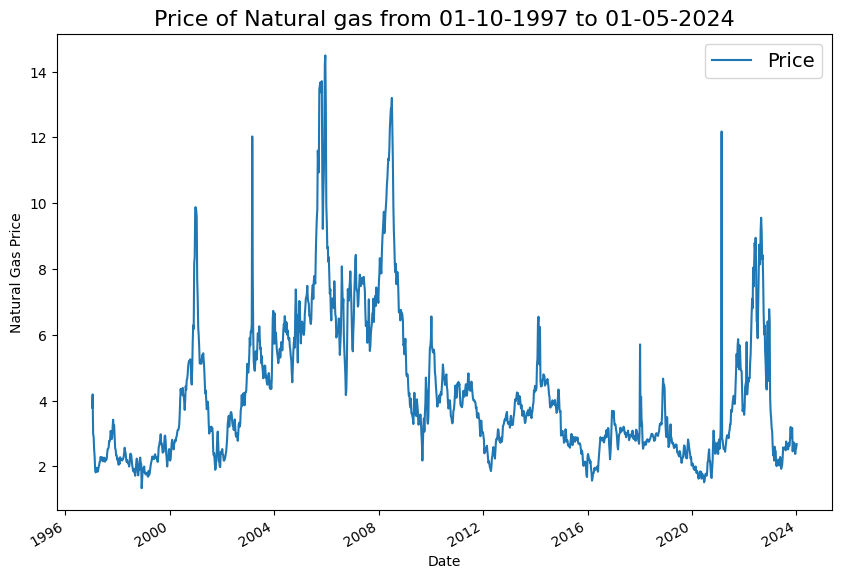

In [ ]:
import matplotlib.pyplot as plt
natural_price.plot(figsize=(10, 7))
plt.ylabel("Natural Gas Price")
plt.title("Price of Natural gas from 01-10-1997 to 01-05-2024", fontsize=16)
plt.legend(fontsize=14);

In [ ]:
import csv
from datetime import datetime

timesteps = []
nat_price = []

with open("/content/Henry_Hub_Natural_Gas_Spot_Price (2) (1).csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    next(csv_reader)

    for line in csv_reader:
        date_str = line[0]
        price_str = line[1]

        if price_str != '':
            timesteps.append(datetime.strptime(date_str, "%m-%d-%Y"))
            nat_price.append(float(price_str))

# View first 10 of each
timesteps[:10], nat_price[:10]


([datetime.datetime(1997, 1, 10, 0, 0),
  datetime.datetime(1997, 1, 17, 0, 0),
  datetime.datetime(1997, 1, 24, 0, 0),
  datetime.datetime(1997, 1, 31, 0, 0),
  datetime.datetime(1997, 2, 7, 0, 0),
  datetime.datetime(1997, 2, 14, 0, 0),
  datetime.datetime(1997, 2, 21, 0, 0),
  datetime.datetime(1997, 2, 28, 0, 0),
  datetime.datetime(1997, 3, 7, 0, 0),
  datetime.datetime(1997, 3, 14, 0, 0)],
 [3.79, 4.19, 2.98, 2.91, 2.53, 2.3, 1.91, 1.82, 1.86, 1.96])

Beautiful! Now, let's see how things look.

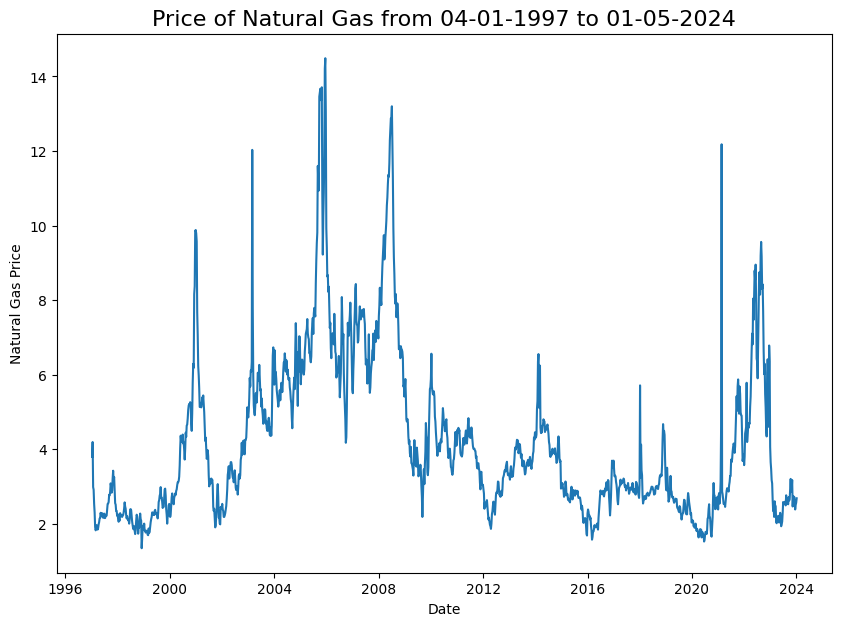

In [ ]:
# Plot from CSV
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, nat_price)
plt.title("Price of Natural Gas from 04-01-1997 to 01-05-2024", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Natural Gas Price");

## Format Data Part 1: Creatining train and test sets for time series data


In [ ]:
# Get natural gas price date array
timesteps = natural_price.index.to_numpy()
prices = natural_price["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['1997-01-10T00:00:00.000000000', '1997-01-17T00:00:00.000000000',
        '1997-01-24T00:00:00.000000000', '1997-01-31T00:00:00.000000000',
        '1997-02-07T00:00:00.000000000', '1997-02-14T00:00:00.000000000',
        '1997-02-21T00:00:00.000000000', '1997-02-28T00:00:00.000000000',
        '1997-03-07T00:00:00.000000000', '1997-03-14T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([3.79, 4.19, 2.98, 2.91, 2.53, 2.3 , 1.91, 1.82, 1.86, 1.96]))

In [ ]:
# Wrong way to make train/test sets for time series
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1126,), (282,), (1126,), (282,))

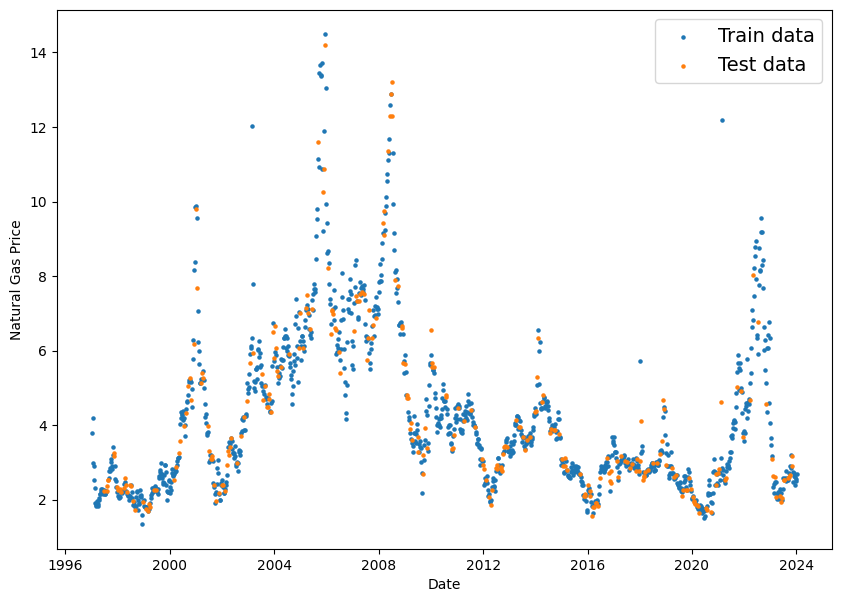

In [ ]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Natural Gas Price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(1126, 282, 1126, 282)

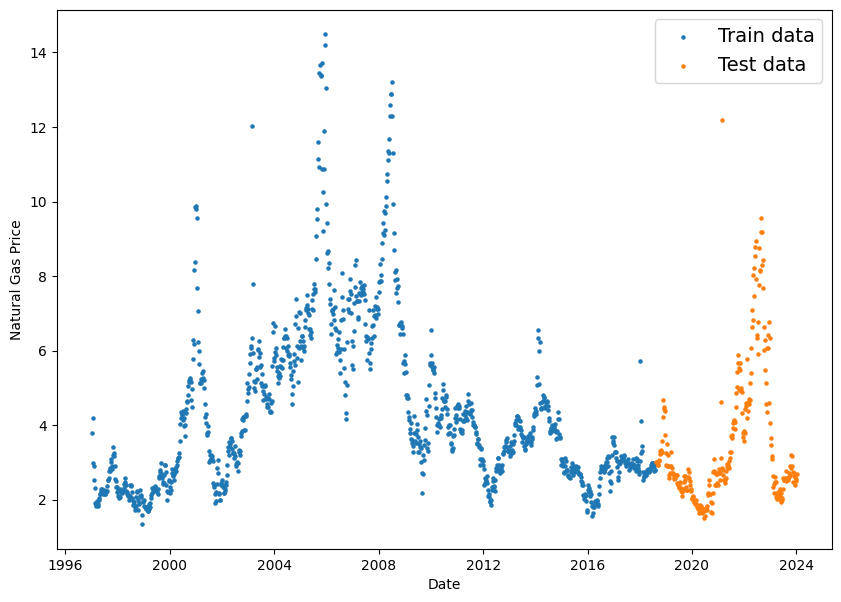

In [ ]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("Natural Gas Price")
plt.legend(fontsize=14)
plt.show();

### Create a plotting function

Rather than retyping `matplotlib` commands to continuously plot data, let's make a plotting function we can reuse later.

In [ ]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Natural Gas Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

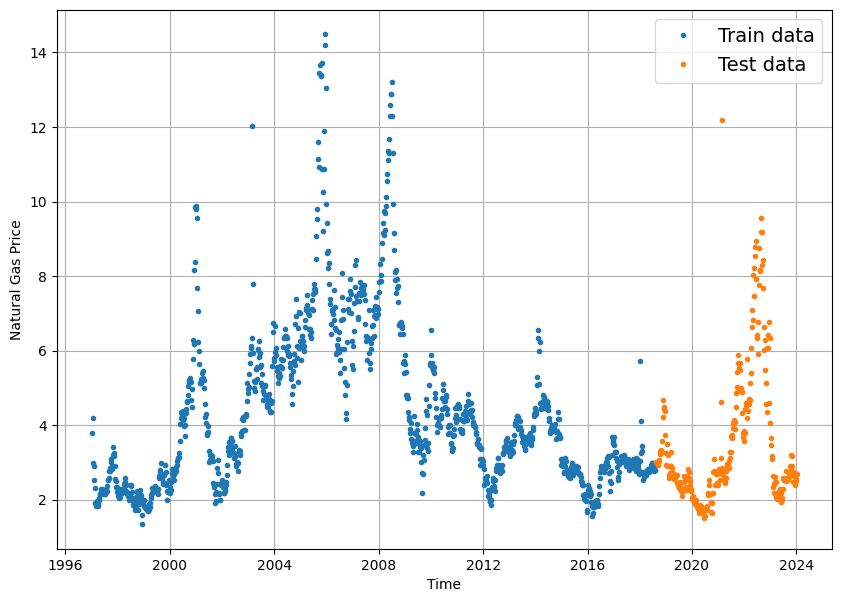

In [ ]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

Looking good!

Time for some modelling experiments.

## Model 0: Naïve forecast (baseline)



In [ ]:
# Create a naïve forecast
naive_forecast = y_test[:-1] # Naïve forecast equals every value excluding the last value
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(array([3.  , 3.01, 2.97, 2.94, 2.93, 3.03, 3.06, 3.23, 3.3 , 3.26]),
 array([2.89, 3.17, 2.46, 2.74, 2.64, 2.72, 2.62, 2.38, 2.5 , 2.56]))

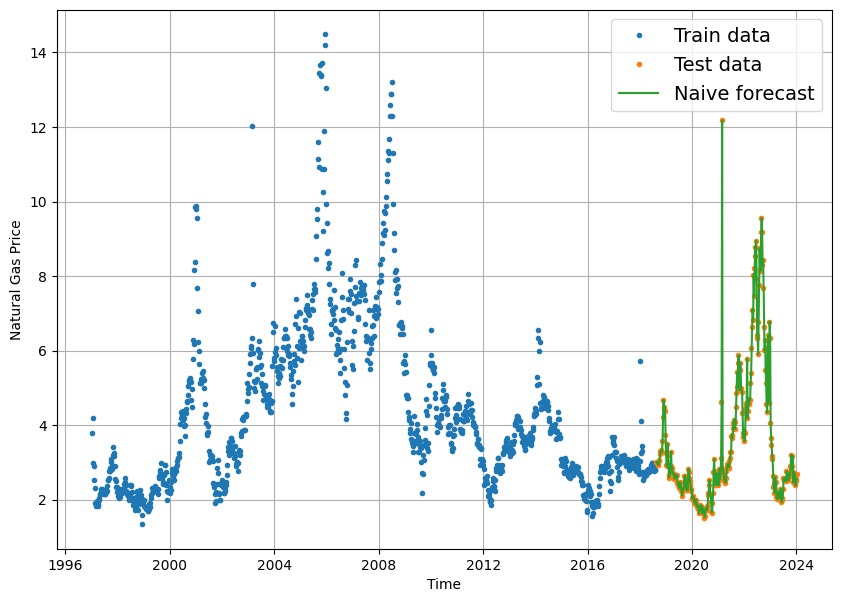

In [ ]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

The naive forecast looks like it's following the data well.

Let's zoom in to take a better look.

We can do so by creating an offset value and passing it to the `start` parameter of our `plot_time_series()` function.

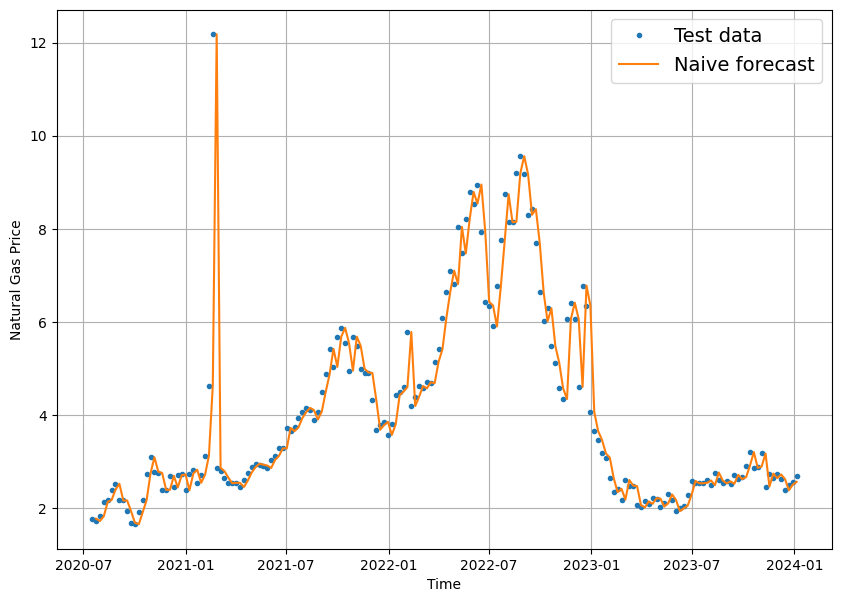

In [ ]:
plt.figure(figsize=(10, 7))
plt.ylabel("Natural gas price")
offset = 100 # offset the values by 100 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

## Evaluating a time series model



In [ ]:
# Let's get TensorFlow!
import tensorflow as tf

In [ ]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 0.3180783,
 'mse': 0.6913054,
 'rmse': 0.8314478,
 'mape': 8.150593,
 'mase': 0.9965529}

In [ ]:
# Find average price of Natural gas price in test dataset
tf.reduce_mean(y_test).numpy()

3.492127659574468

## Format Data Part 2: Windowing dataset



In [ ]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 14 # use a week worth of timesteps to predict the horizon

Now we'll write a function to take in an array and turn it into a window and horizon.

In [ ]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1394, 1394)

In [ ]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [3.79 4.19 2.98 2.91 2.53 2.3  1.91 1.82 1.86 1.96 1.91 1.84 1.88 1.98] -> Label: [2.04]
Window: [4.19 2.98 2.91 2.53 2.3  1.91 1.82 1.86 1.96 1.91 1.84 1.88 1.98 2.04] -> Label: [2.14]
Window: [2.98 2.91 2.53 2.3  1.91 1.82 1.86 1.96 1.91 1.84 1.88 1.98 2.04 2.14] -> Label: [2.15]


In [ ]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [2.71 2.62 2.66 2.91 3.2  2.86 2.89 3.17 2.46 2.74 2.64 2.72 2.62 2.38] -> Label: [2.5]
Window: [2.62 2.66 2.91 3.2  2.86 2.89 3.17 2.46 2.74 2.64 2.72 2.62 2.38 2.5 ] -> Label: [2.56]
Window: [2.66 2.91 3.2  2.86 2.89 3.17 2.46 2.74 2.64 2.72 2.62 2.38 2.5  2.56] -> Label: [2.68]




## Turning windows into training and test sets


In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1115, 279, 1115, 279)

In [ ]:
train_windows[:5], train_labels[:5]

(array([[3.79, 4.19, 2.98, 2.91, 2.53, 2.3 , 1.91, 1.82, 1.86, 1.96, 1.91,
         1.84, 1.88, 1.98],
        [4.19, 2.98, 2.91, 2.53, 2.3 , 1.91, 1.82, 1.86, 1.96, 1.91, 1.84,
         1.88, 1.98, 2.04],
        [2.98, 2.91, 2.53, 2.3 , 1.91, 1.82, 1.86, 1.96, 1.91, 1.84, 1.88,
         1.98, 2.04, 2.14],
        [2.91, 2.53, 2.3 , 1.91, 1.82, 1.86, 1.96, 1.91, 1.84, 1.88, 1.98,
         2.04, 2.14, 2.15],
        [2.53, 2.3 , 1.91, 1.82, 1.86, 1.96, 1.91, 1.84, 1.88, 1.98, 2.04,
         2.14, 2.15, 2.29]]),
 array([[2.04],
        [2.14],
        [2.15],
        [2.29],
        [2.22]]))

In [ ]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

False

## Make a modelling checkpoint


In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

## Model 1: Dense model (window = 7, horizon = 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
9/9 [==============================] - 4s 220ms/step - loss: 0.7295 - mae: 0.7295 - val_loss: 0.5959 - val_mae: 0.5959
Epoch 2/100
9/9 [==============================] - 1s 101ms/step - loss: 0.5496 - mae: 0.5496 - val_loss: 0.5710 - val_mae: 0.5710
Epoch 3/100
9/9 [==============================] - 1s 64ms/step - loss: 0.4722 - mae: 0.4722 - val_loss: 0.5376 - val_mae: 0.5376
Epoch 4/100
9/9 [==============================] - 1s 70ms/step - loss: 0.4181 - mae: 0.4181 - val_loss: 0.4726 - val_mae: 0.4726
Epoch 5/100
9/9 [==============================] - 1s 74ms/step - loss: 0.3731 - mae: 0.3731 - val_loss: 0.4458 - val_mae: 0.4458
Epoch 6/100
9/9 [==============================] - 1s 73ms/step - loss: 0.3409 - mae: 0.3409 - val_loss: 0.4198 - val_mae: 0.4198
Epoch 7/100
9/9 [==============================] - 0s 49ms/step - loss: 0.3262 - mae: 0.3262 - val_loss: 0.4118 - val_mae: 0.4118
Epoch 8/100
9/9 [==============================] - 1s 80ms/step - loss: 0.3162 - mae: 0.

In [ ]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

9/9 [==============================] - 0s 2ms/step - loss: 0.3442 - mae: 0.3442


[0.3441738486289978, 0.3441738486289978]

In [ ]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

9/9 [==============================] - 0s 2ms/step - loss: 0.3274 - mae: 0.3274


[0.32737094163894653, 0.32737094163894653]

## Making forecasts with a model (on the test dataset)

Since we're going to be running more modelling experiments, let's write a function which:
1. Takes in a trained model (just like `model_1`)
2. Takes in some input data (just like the data the model was trained on)
3. Passes the input data to the model's `predict()` method
4. Returns the predictions



In [ ]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [ ]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

9/9 [==============================] - 0s 2ms/step


(279,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([2.9721093, 2.92879  , 2.9347873, 3.0470939, 3.088119 , 3.2494545,
        3.3202837, 3.2770371, 3.3419693, 3.3038769], dtype=float32)>)

In [ ]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 0.3273709,
 'mse': 0.5132377,
 'rmse': 0.7164061,
 'mape': 8.570664,
 'mase': 1.019139}

How did our model go? Did it beat the naïve forecast?

In [ ]:
naive_results

{'mae': 0.3180783,
 'mse': 0.6913054,
 'rmse': 0.8314478,
 'mape': 8.150593,
 'mase': 0.9965529}

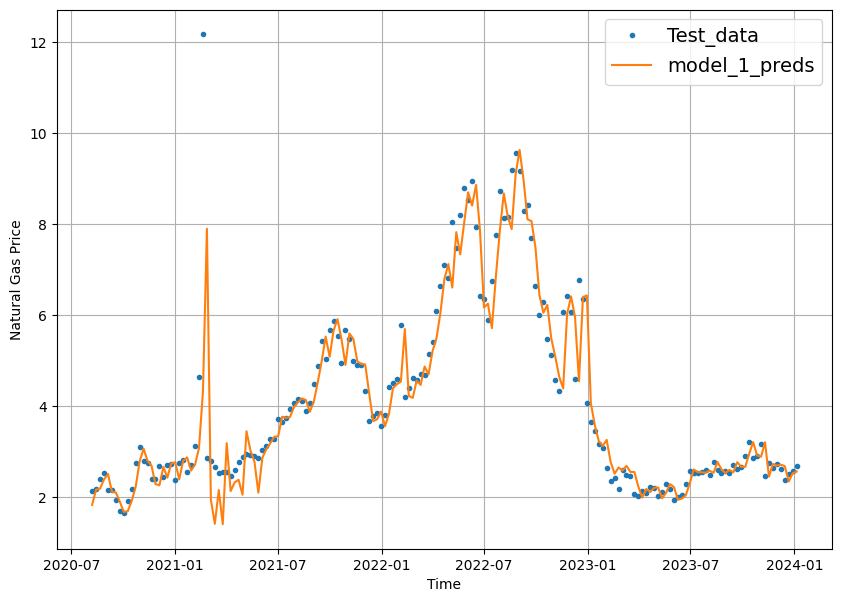

In [ ]:
offset = 100
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

## Model 2: Dense (window = 30, horizon = 1)


In [ ]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [ ]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1378, 1378)

In [ ]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1102, 276, 1102, 276)

In [ ]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [ ]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

9/9 [==============================] - 0s 2ms/step - loss: 0.3921


0.39211857318878174

In [ ]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

9/9 [==============================] - 0s 2ms/step - loss: 0.3745


0.37445080280303955

In [ ]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

9/9 [==============================] - 0s 2ms/step


In [ ]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 0.3744508,
 'mse': 0.55100745,
 'rmse': 0.7422988,
 'mape': 9.925949,
 'mase': 1.1549346}

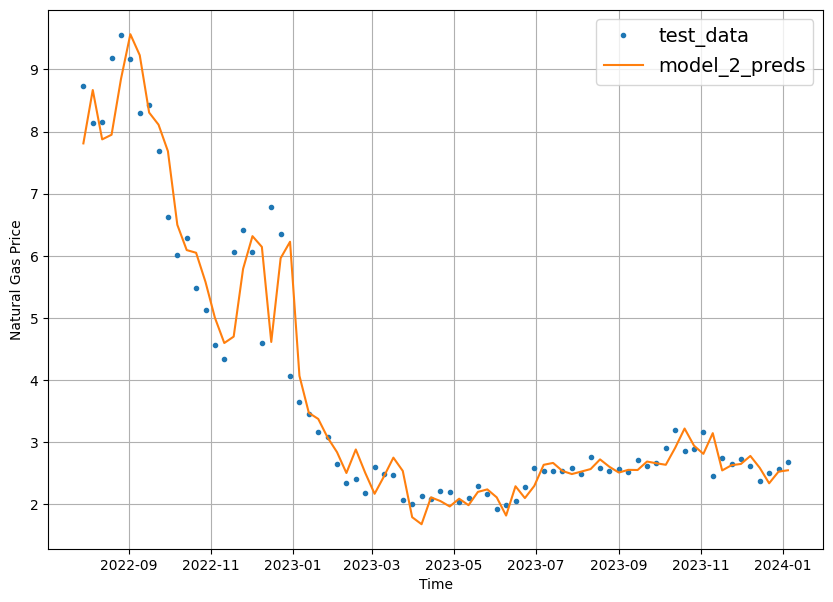

In [ ]:
offset = 200
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

## Model 3: Dense (window = 30, horizon = 7)


In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1372, 1372)

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(1097, 275, 1097, 275)

In [ ]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)

9/9 [==============================] - 0s 2ms/step - loss: 0.6340


0.6339805722236633

In [ ]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

9/9 [==============================] - 0s 2ms/step - loss: 0.6294


0.6294050216674805

In [ ]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

9/9 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[3.0460174, 3.0156574, 3.0405693, 3.0420134, 3.0982728, 3.1162555,
        3.1549406],
       [3.0736315, 3.1289353, 3.0593617, 3.104892 , 3.1825938, 3.2088091,
        3.2130978],
       [3.05311  , 3.0844722, 3.068575 , 3.1439383, 3.1486166, 3.1707697,
        3.2288296],
       [3.0063028, 3.0010233, 3.0418005, 3.1201754, 3.087008 , 3.1307952,
        3.18205  ],
       [2.9863856, 3.0006814, 3.0258462, 3.0986097, 3.075185 , 3.1103766,
        3.1789985]], dtype=float32)>

In [ ]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([0.07054932, 0.10392962, 0.09026848, 0.10192145, 0.14341667,
        0.17432448, 0.30344883, 0.38197517, 0.49060532, 0.6345415 ,
        0.7523624 , 0.78650826, 0.700843  , 0.57218033, 0.6821047 ,
        0.8171171 , 0.9991943 , 1.0905553 , 0.8008474 , 0.5605411 ,
        0.38732567, 0.35204348, 0.4664678 , 0.4733983 , 0.35471162,
        0.1333379 , 0.13461778, 0.2200707 , 0.15886453, 0.3860148 ,
        0.30373073, 0.23722959, 0.10946941, 0.06847726, 0.10399324,
        0.10050576, 0.12238663, 0.08541699, 0.09211718, 0.1819864 ,
        0.1623479 , 0.1767497 , 0.06186059, 0.08274116, 0.1124349 ,
        0.13025148, 0.12644175, 0.21570261, 0.16636117, 0.11844932,
        0.14530532, 0.18746935, 0.19369401, 0.19130619, 0.20942071,
        0.17153655, 0.18290976, 0.23113966, 0.20650212, 0.16451478,
        0.16881378, 0.22491683, 0.28162903, 0.2179514 , 0.3907741 ,
        0.5236229 , 0.5304223 , 0.4817681 , 0.45092583, 0.3813305 ,
        0.44819885, 0.29979065, 0.2281553

In [ ]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [ ]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 0.629405,
 'mse': 1.1402841,
 'rmse': 0.7539472,
 'mape': 16.51583,
 'mase': 1.9404283}

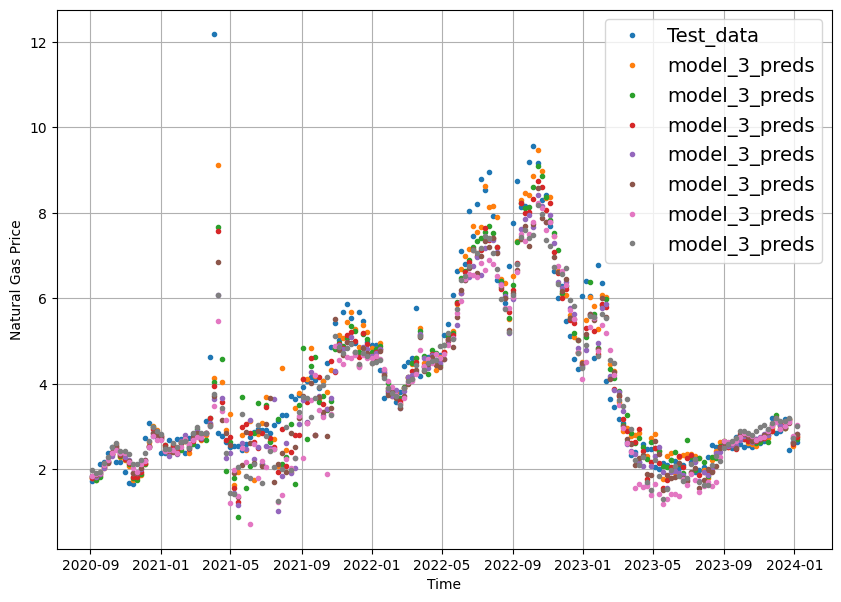

In [ ]:
offset = 100
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

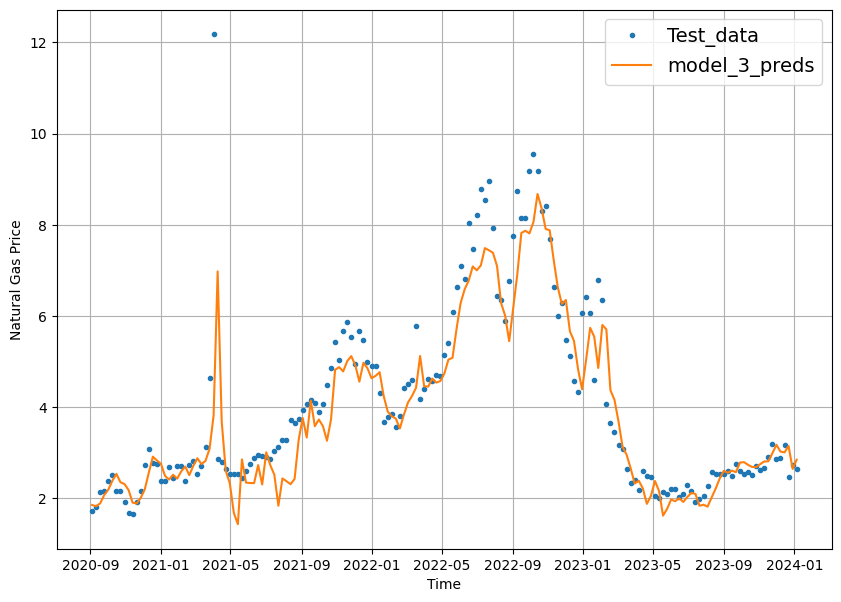

In [ ]:
offset = 100
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")

## Which of our models is performing best so far?


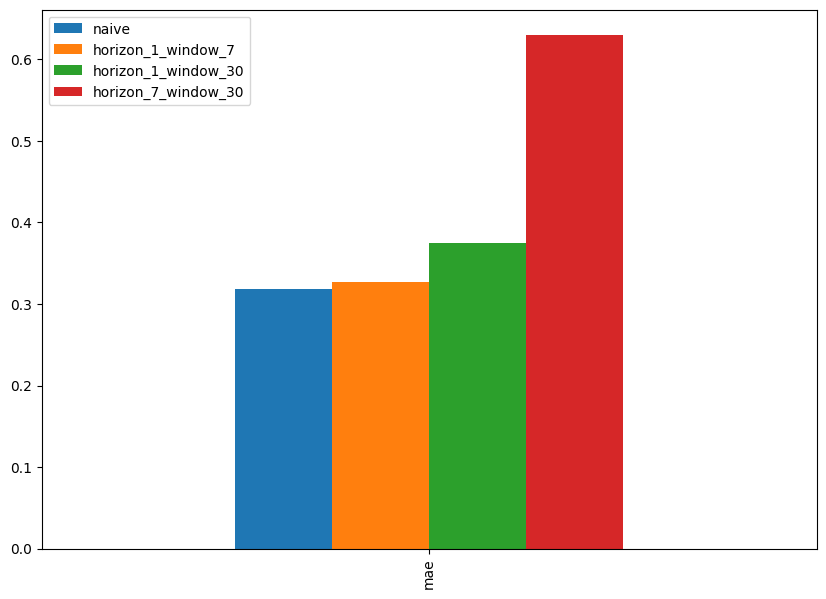

In [ ]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

## Model 5: RNN (LSTM)









In [ ]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [ ]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

9/9 [==============================] - 0s 3ms/step - loss: 0.3302


0.33015456795692444

In [ ]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

9/9 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([2.9860656, 2.9913998, 2.9591825, 2.9295523, 2.9235766, 3.0057914,
       3.048706 , 3.1829   , 3.2665586, 3.239678 ], dtype=float32)>

In [ ]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 0.33015457,
 'mse': 0.6734959,
 'rmse': 0.8206679,
 'mape': 8.560474,
 'mase': 1.0343883}

ValueError: x and y must have same first dimension, but have shapes (281,) and (275,)

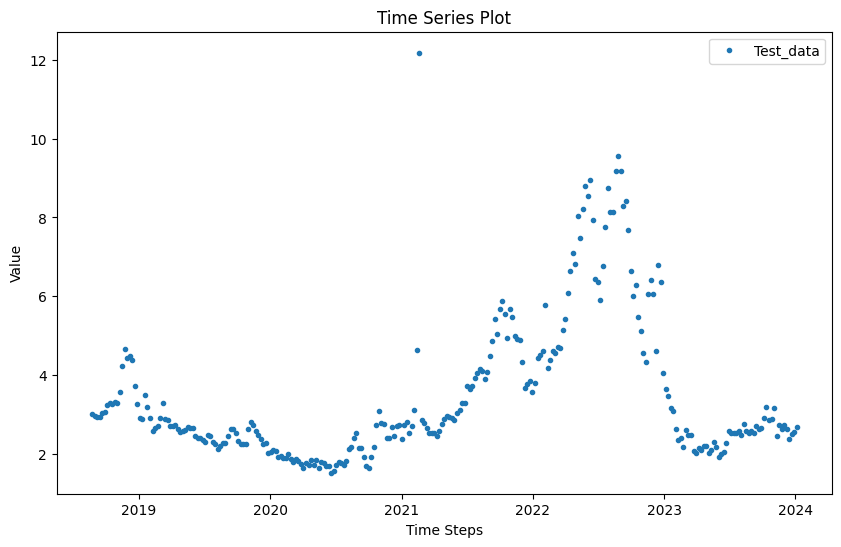

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_time_series(timesteps, values, format='-', start=0, label=None):
    """
    Plot time series data.

    Parameters:
    - timesteps: Array of time steps.
    - values: Array of values to be plotted.
    - format: Line format for Matplotlib.
    - start: Starting index for the plot.
    - label: Label for the plot.
    """
    plt.plot(timesteps[start:], values[start:], format, label=label)
    plt.xlabel('Time Steps')
    plt.ylabel('Value')
    plt.title('Time Series Plot')
    if label:
        plt.legend()

# Assuming X_test is your time steps array
offset = 0  # You can adjust the offset based on your data

# Plotting the time series
plt.figure(figsize=(10, 6))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data", format = '.')
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="RNN(LSTM)")
plt.show()


In [ ]:
# Let's make a multivariate time series
natural_price.head()

In [ ]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")

In [ ]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - natural_price.index[0]).days
block_reward_3_days = (block_reward_4_datetime - natural_price.index[0]).days
block_reward_2_days, block_reward_3_days

In [ ]:
# Add block_reward column
natural_prices_block = natural_price.copy()
natural_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
natural_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
natural_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
natural_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
natural_prices_block.head()

In [ ]:
# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(natural_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=natural_prices_block.columns,
                                     index=natural_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

## Making a windowed dataset with pandas


In [ ]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of the historical data with block reward feature
natural_prices_windowed = natural_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  natural_prices_windowed[f"Price+{i+1}"] = natural_prices_windowed["Price"].shift(periods=i+1)
natural_prices_windowed.head(10)

In [ ]:
# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors
X = natural_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32)
y = natural_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

In [ ]:
# View labels
y.head()

In [ ]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

## Model 6: Dense (multivariate time series)


In [ ]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

In [ ]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

In [ ]:
# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

In [ ]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

In [ ]:
model_1_results

## Model 7: N-BEATS algorithm



In [ ]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.3066138  -0.06580931 -0.14533126 -0.51901853 -0.29887515 -0.2704978
  0.14316323]
Forecast: -0.3040126860141754


### Preparing data for the N-BEATS algorithm using `tf.data`



In [ ]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [ ]:
# Create NBEATS data inputs (NBEATS works with univariate time series)
natural_price.head()

,Price
Date,
1997-01-10,3.79
1997-01-17,4.19
1997-01-24,2.98
1997-01-31,2.91
1997-02-07,2.53


In [ ]:
# Add windowed columns
natural_prices_nbeats = natural_price.copy()
for i in range(WINDOW_SIZE):
  natural_prices_nbeats[f"Price+{i+1}"] = natural_prices_nbeats["Price"].shift(periods=i+1)
natural_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
1997-02-28,1.82,1.91,2.30,2.53,2.91,2.98,4.19,3.79
1997-03-07,1.86,1.82,1.91,2.30,2.53,2.91,2.98,4.19
1997-03-14,1.96,1.86,1.82,1.91,2.30,2.53,2.91,2.98
1997-03-21,1.91,1.96,1.86,1.82,1.91,2.30,2.53,2.91
1997-03-28,1.84,1.91,1.96,1.86,1.82,1.91,2.30,2.53


In [ ]:
# Make features and labels
X = natural_prices_nbeats.dropna().drop("Price", axis=1)
y = natural_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(1120, 1120, 281, 281)

In [ ]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [ ]:
 %%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 135: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 235: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 1min 21s, sys: 2.35 s, total: 1min 24s
Wall time: 1min 26s


In [ ]:
# Evaluate N-BEATS model on the test dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 29ms/step - loss: 0.3194 - mae: 0.3194 - mse: 0.5082


[0.31940433382987976, 0.31940433382987976, 0.5082128643989563]

In [ ]:
# Make predictions with N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 2s 2s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([2.9939497, 2.9913375, 2.9659758, 2.9501505, 2.9307292, 3.0345838,
       3.0542743, 3.214301 , 3.2893543, 3.2477958], dtype=float32)>

In [ ]:
# Evaluate N-BEATS model predictions
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 0.31940433,
 'mse': 0.50821286,
 'rmse': 0.7128905,
 'mape': 8.165869,
 'mase': 1.0007074}

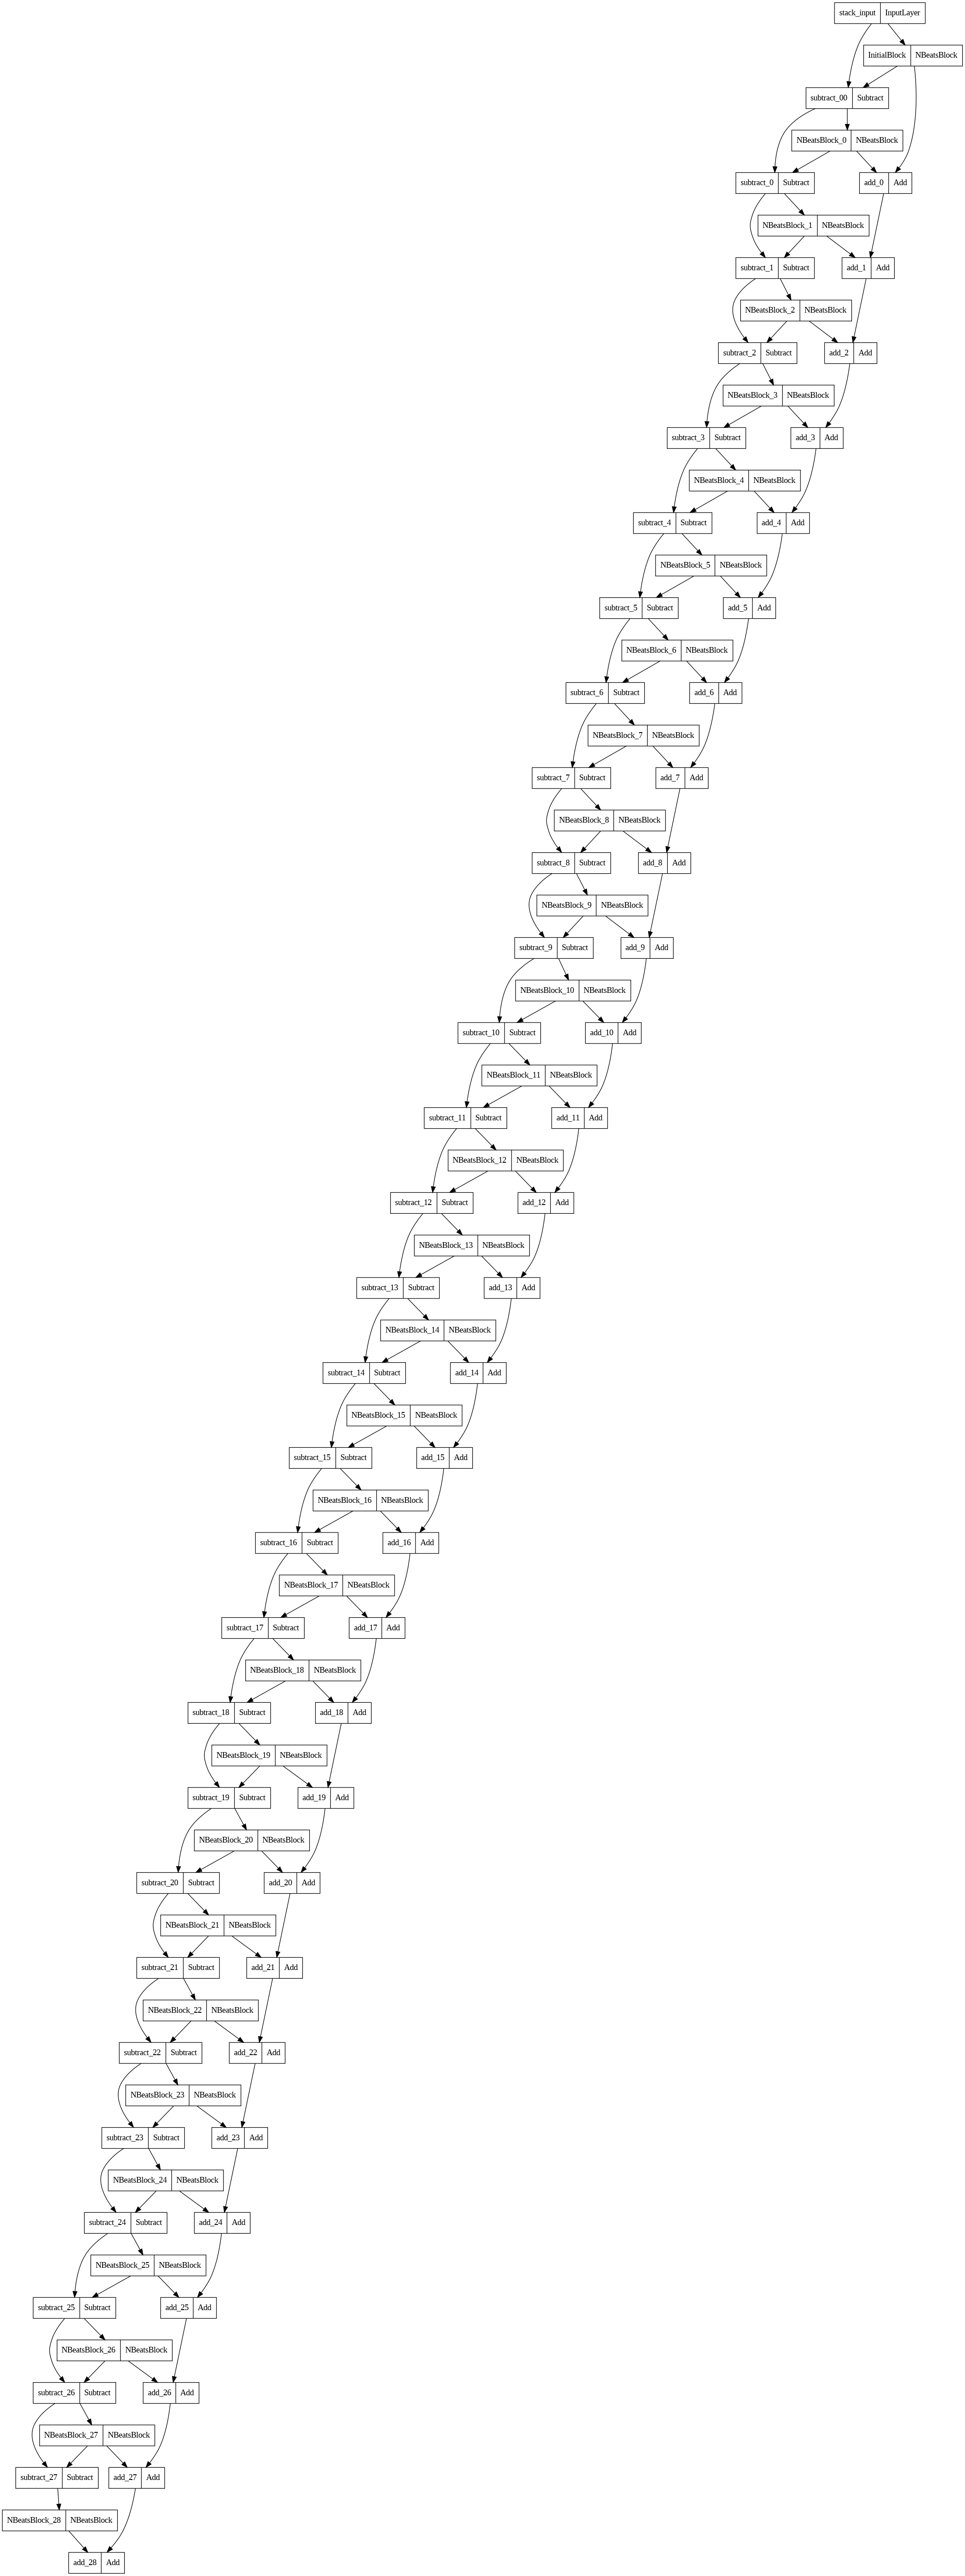

In [ ]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

Nice! Looks like the ensemble model is the best performing model on the MAE metric so far.

## Compare Models



In [ ]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"Naive Model": naive_results,
                              "Dense Model": model_3_results,
                              "RNN(LSTM)": model_5_results,
                              "N-BEATS": model_7_results,
                             }).T
model_results.head(10)

,mae,mse,rmse,mape,mase
Naive Model,0.318078,0.691305,0.831448,8.150593,0.996553
Dense Model,0.641662,1.157678,0.769810,16.889462,1.978216
RNN(LSTM),0.330232,0.681698,0.825650,8.547182,1.034630
N-BEATS,0.307830,0.464849,0.681799,7.806553,0.964446


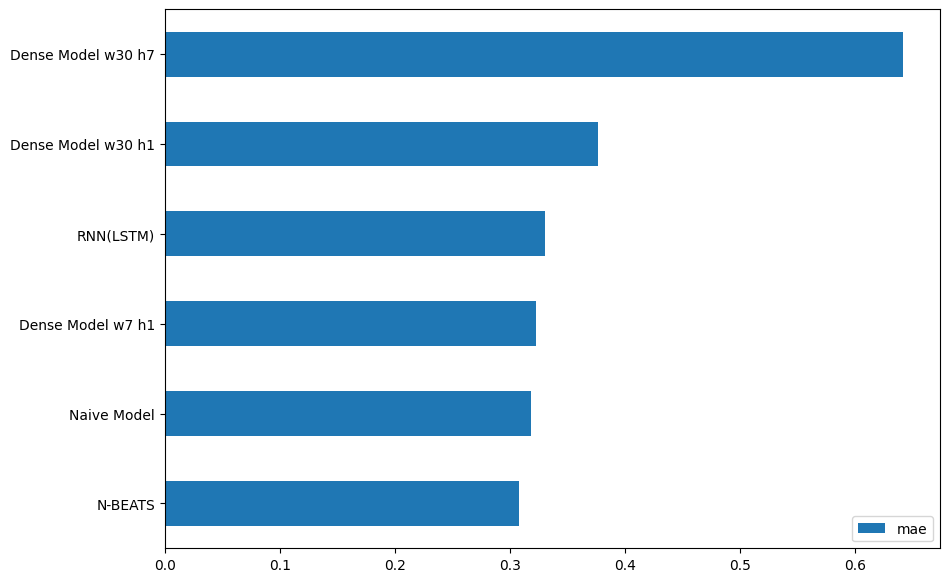

In [ ]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="barh");

In [ ]:
# Assuming you have the model_results DataFrame with metrics columns
model_results['total_score'] = model_results['mae'] + model_results['mse'] + model_results['mape'] + model_results['rmse']

best_model = model_results.loc[model_results['total_score'].idxmin()]
print(f"The best-performing model is Model {best_model.name} with a total score of {best_model['total_score']}")


The best-performing model is Model N-BEATS with a total score of 9.261031150817871


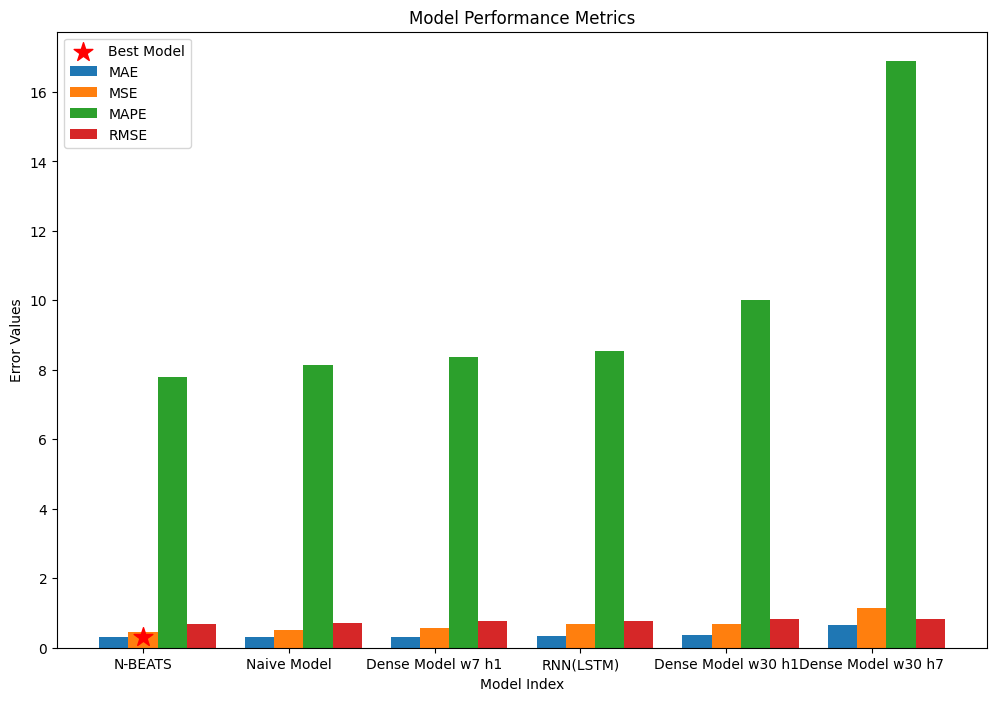

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the model_results DataFrame with metrics columns
model_results['total_score'] = model_results['mae'] + model_results['mse'] + model_results['mape'] + model_results['rmse']

# Find the best-performing model
best_model = model_results.loc[model_results['total_score'].idxmin()]

# Sort model results by MAE, MSE, MAPE, and RMSE
sorted_mae = model_results[["mae"]].sort_values(by="mae")
sorted_mse = model_results[["mse"]].sort_values(by="mse")
sorted_mape = model_results[["mape"]].sort_values(by="mape")
sorted_rmse = model_results[["rmse"]].sort_values(by="rmse")

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Define the width of the bars
bar_width = 0.2
index = np.arange(len(model_results))

# Plot bars for each metric
ax.bar(index - bar_width, sorted_mae["mae"], width=bar_width, label='MAE')
ax.bar(index, sorted_mse["mse"], width=bar_width, label='MSE')
ax.bar(index + bar_width, sorted_mape["mape"], width=bar_width, label='MAPE')
ax.bar(index + 2 * bar_width, sorted_rmse["rmse"], width=bar_width, label='RMSE')

# Highlight the best-performing model
ax.scatter(best_model.name, best_model['mae'], color='red', marker='*', s=200, label='Best Model')

# Set labels and title
ax.set_xlabel('Model Index')
ax.set_ylabel('Error Values')
ax.set_title('Model Performance Metrics')
ax.set_xticks(index)
ax.set_xticklabels(sorted_mae.index)
ax.legend()

# Show the plot
plt.show()


In [ ]:
# Assuming you have the model_results DataFrame with metrics columns
model_results['mae_rank'] = model_results['mae'].rank()
model_results['mse_rank'] = model_results['mse'].rank()
model_results['mape_rank'] = model_results['mape'].rank()
model_results['rmse_rank'] = model_results['rmse'].rank()

model_results['average_rank'] = model_results[['mae_rank', 'mse_rank', 'mape_rank', 'rmse_rank']].mean(axis=1)

best_model = model_results.loc[model_results['average_rank'].idxmin()]
print(f"The best-performing model is Model {best_model.name} with an average rank of {best_model['average_rank']}")


The best-performing model is Model N-BEATS with an average rank of 1.0


<Figure size 1500x1600 with 0 Axes>

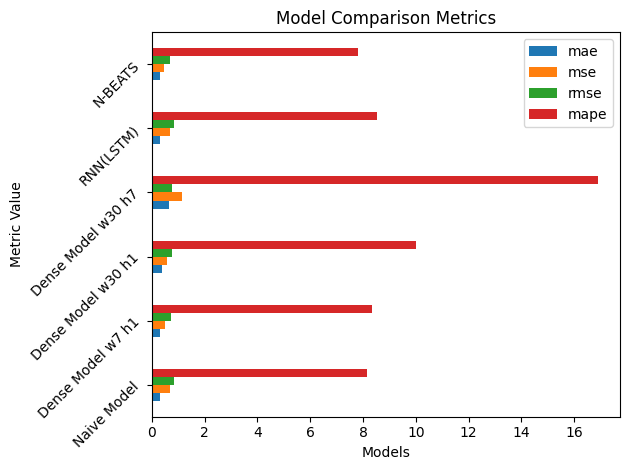

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Compare different model results
model_results = pd.DataFrame({
    "Naive Model": naive_results,
    "Dense Model w7 h1": model_1_results,
    "Dense Model w30 h1": model_2_results,
    "Dense Model w30 h7": model_3_results,
    "RNN(LSTM)": model_5_results,
    "N-BEATS": model_7_results
}).T

# Plot metrics for all models
# Plot metrics for all models with adjusted layout
plt.figure(figsize=(15, 16))
model_results.plot(kind='barh', y=["mae", "mse", "rmse", "mape"], rot=45, layout=(len(model_results), 1))
plt.title("Model Comparison Metrics")
plt.ylabel("Metric Value")
plt.xlabel("Models")
plt.tight_layout()  # Adjust layout for better spacing
plt.show()
